Name: Devoleena Dasgupta

Heart attack prediction using decision tree algorithm

Importing all libraries:

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier                  
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree

In [6]:
#importing data:
df=pd.read_csv('heart.csv')

In [7]:
#observing attribute information:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [9]:
df.tail()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [10]:
#checking for null values:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [11]:
#observing statistical characteristics of data:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trtbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalachh,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exng,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [12]:
#Forming correlation matrix:
corr_df=df.corr()
corr_df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trtbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalachh,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exng,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


<AxesSubplot:>

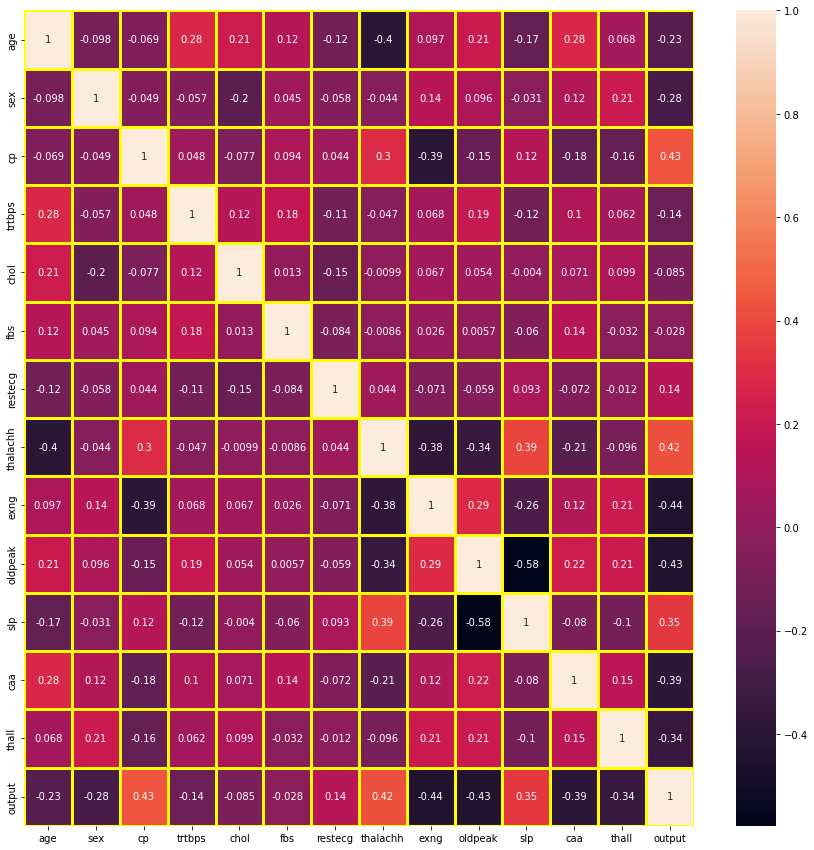

In [13]:
plt.figure(figsize=(15,15))
sns.heatmap(data=corr_df, annot=True, linewidth=3, linecolor='yellow')

In [14]:
#Removing negative values from output feature:
output_value=np.array(corr_df['output'])
for i in range(len(output_value)):
    if output_value[i] < 0:
        output_value[i] = -output_value[i]
        
output_value

array([0.22543872, 0.28093658, 0.43379826, 0.14493113, 0.08523911,
       0.02804576, 0.1372295 , 0.42174093, 0.43675708, 0.430696  ,
       0.34587708, 0.39172399, 0.34402927, 1.        ])

Feature sorting according to correlation:

In [15]:
sorted_feature_corr=pd.DataFrame(output_value, index=corr_df['output'].index, 
                                 columns=['correlation']).sort_values(by=['correlation'], ascending=False)
sorted_feature_corr

,correlation
output,1.000000
exng,0.436757
cp,0.433798
oldpeak,0.430696
thalachh,0.421741
caa,0.391724
slp,0.345877
thall,0.344029
sex,0.280937
age,0.225439


In [16]:
feature_selected=sorted_feature_corr.index
feature_selected

Index(['output', 'exng', 'cp', 'oldpeak', 'thalachh', 'caa', 'slp', 'thall',
       'sex', 'age', 'trtbps', 'restecg', 'chol', 'fbs'],
      dtype='object')

In [17]:
clean_data=df[feature_selected]
clean_data

,output,exng,cp,oldpeak,thalachh,caa,slp,thall,sex,age,trtbps,restecg,chol,fbs
0,1,0,3,2.3,150,0,0,1,1,63,145,0,233,1
1,1,0,2,3.5,187,0,0,2,1,37,130,1,250,0
2,1,0,1,1.4,172,0,2,2,0,41,130,0,204,0
3,1,0,1,0.8,178,0,2,2,1,56,120,1,236,0
4,1,1,0,0.6,163,0,2,2,0,57,120,1,354,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0,1,0,0.2,123,0,1,3,0,57,140,1,241,0
299,0,0,3,1.2,132,0,1,3,1,45,110,1,264,0
300,0,0,0,3.4,141,2,1,3,1,68,144,1,193,1
301,0,1,0,1.2,115,1,1,3,1,57,130,1,131,0


Removing target variable:

In [18]:
X=clean_data.iloc[:,1:]
X

,exng,cp,oldpeak,thalachh,caa,slp,thall,sex,age,trtbps,restecg,chol,fbs
0,0,3,2.3,150,0,0,1,1,63,145,0,233,1
1,0,2,3.5,187,0,0,2,1,37,130,1,250,0
2,0,1,1.4,172,0,2,2,0,41,130,0,204,0
3,0,1,0.8,178,0,2,2,1,56,120,1,236,0
4,1,0,0.6,163,0,2,2,0,57,120,1,354,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,1,0,0.2,123,0,1,3,0,57,140,1,241,0
299,0,3,1.2,132,0,1,3,1,45,110,1,264,0
300,0,0,3.4,141,2,1,3,1,68,144,1,193,1
301,1,0,1.2,115,1,1,3,1,57,130,1,131,0


In [19]:
Y=clean_data['output']
Y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: output, Length: 303, dtype: int64

Splitting feature and target variable into training and testing data:

In [20]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.15,random_state=1)

In [21]:
#shape of train and test data:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape) 

(257, 13) (257,) (46, 13) (46,)


Preprocessing train and test variable to fit standard distribution:

In [22]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Train Logistic Regression model
lg = LogisticRegression()
lg.fit(x_train, y_train)

# Make predictions
y_pred = lg.predict(x_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.74


In [28]:
#training the model using sklearn DecisionTreeClassifier

dt=DecisionTreeClassifier(criterion='entropy',max_depth=5)
dt.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [29]:
#predicting the value on testing data
y_pred=dt.predict(x_test)
y_pred

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1], dtype=int64)

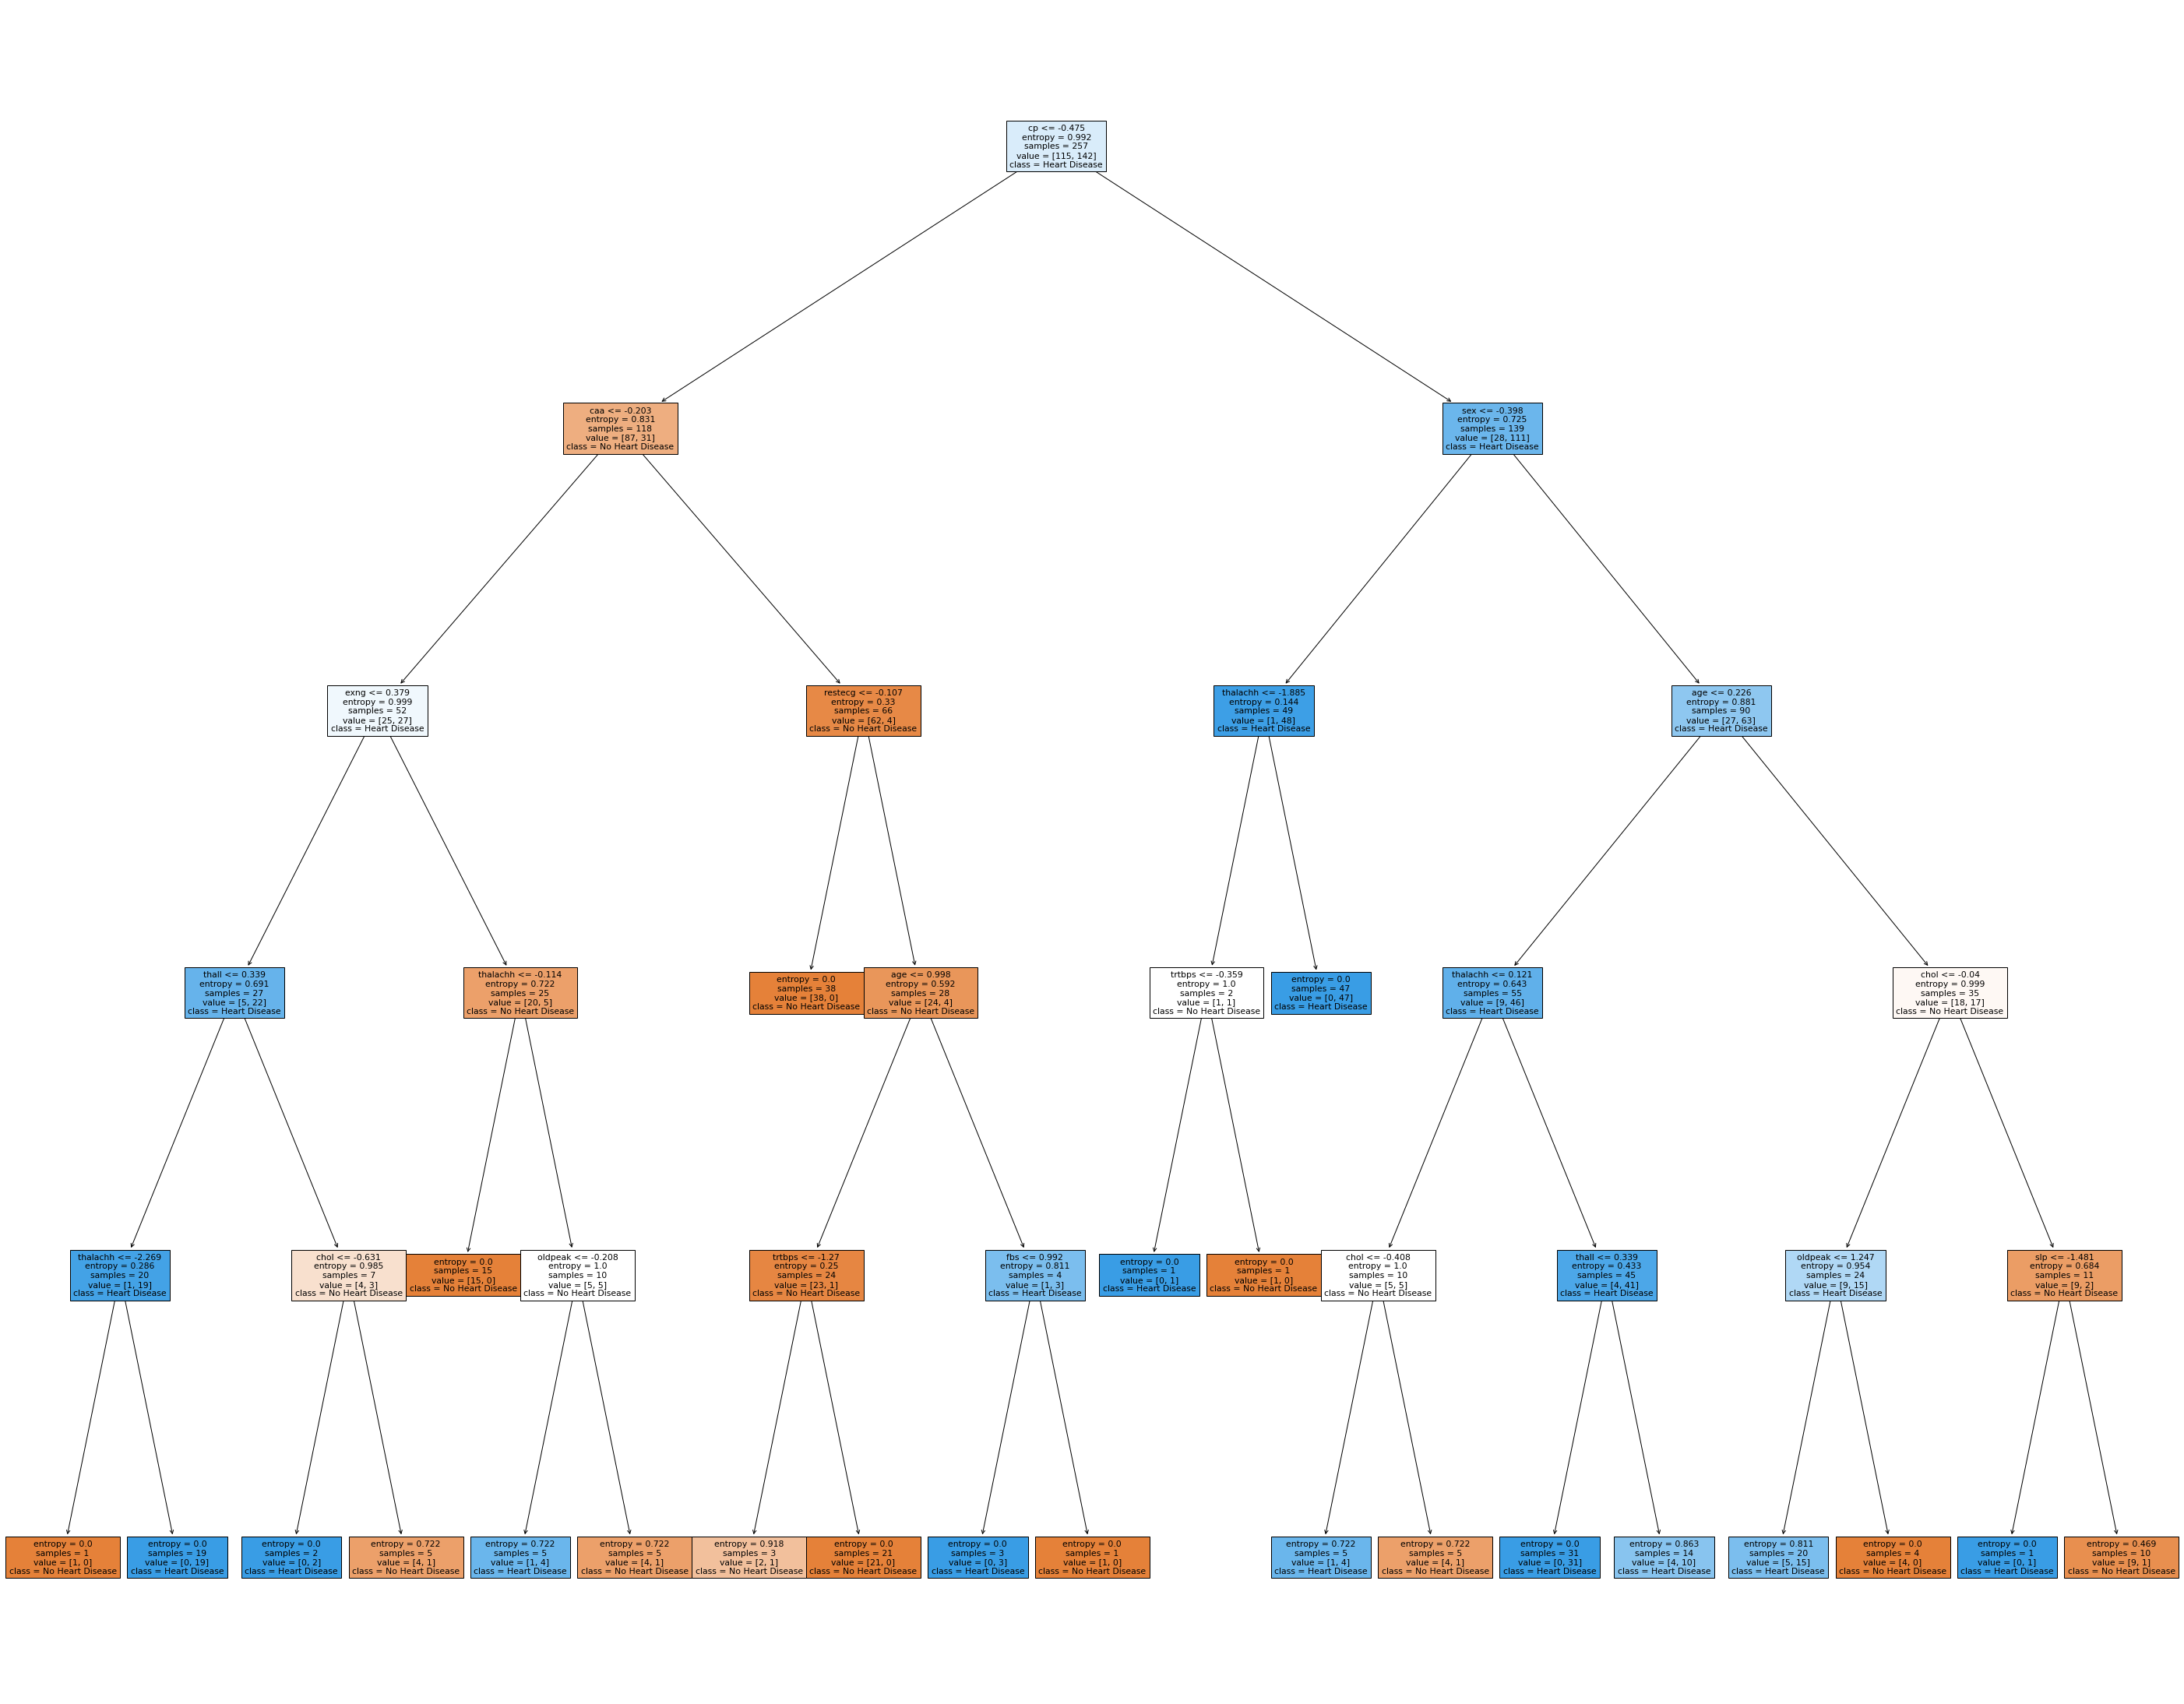

In [30]:
plt.figure(figsize=(50,40))
plot_tree(dt, filled=True, feature_names=X.columns, class_names=["No Heart Disease", "Heart Disease"])
plt.show()

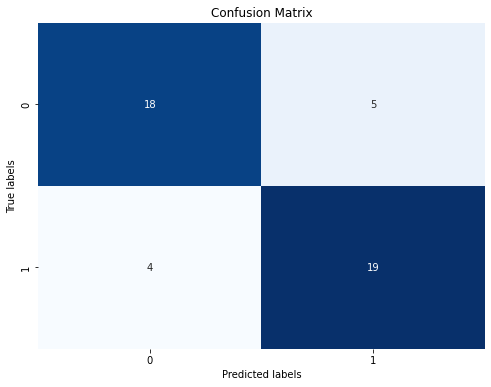


The accuracy of decision tree classifier on Heart disease prediction dataset is 80.43%


In [31]:
#ploting the data
from sklearn.metrics import confusion_matrix
conf_mat=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()
accuracy=dt.score(x_test,y_test)
print("\nThe accuracy of decision tree classifier on Heart disease prediction dataset is "+str(round(accuracy*100,2))+"%")